In [25]:
words = open('names.txt', 'r').read().splitlines()

In [26]:
len(words)

32033

In [27]:
min([len(w) for w in words])

2

In [28]:
max([len(w) for w in words])

15

In [29]:
import torch

In [ ]:
N = torch.ones(27, 27)
N.shape

In [ ]:
P = torch.ones(27, 27)

In [ ]:
for i in range(27):
    P[i] = N[i] / sum(N[i])


In [ ]:
sum_arr = N.sum(dim=1)

In [ ]:
N.shape, sum_arr.shape

In [ ]:
N / sum_arr

In [ ]:
sum_a = sum(N[i,:])
27, 27
1, 27

In [30]:
len(words)

32033

In [32]:
b = {}
for w in words:
    chs = ['<s>'] + list(w) + ['<e>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1


In [33]:
b.items()

dict_items([(('<s>', 'e'), 1531), (('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('a', '<e>'), 6640), (('<s>', 'o'), 394), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('<s>', 'a'), 4410), (('a', 'v'), 834), (('v', 'a'), 642), (('<s>', 'i'), 591), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('<s>', 's'), 2055), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('<s>', 'c'), 1542), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('e', '<e>'), 3983), (('<s>', 'm'), 2538), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('<s>', 'h'), 874), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('r', '<e>'), 1377), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'), 18

In [37]:
# sorted(b.items(), key=lambda kv: -kv[1])
type(words)

list

In [51]:
N = torch.zeros((27, 27), dtype=torch.int32)
chars = sorted(list(set(''.join(words))))
stoi = {c: i+1 for i, c in enumerate(chars)}
stoi['.'] = 0

itos = {i: c for c, i in stoi.items()}
# itos

In [52]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1


In [53]:
N[0, 10]

tensor(2422, dtype=torch.int32)

In [54]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

(-0.5, 26.5, 26.5, -0.5)

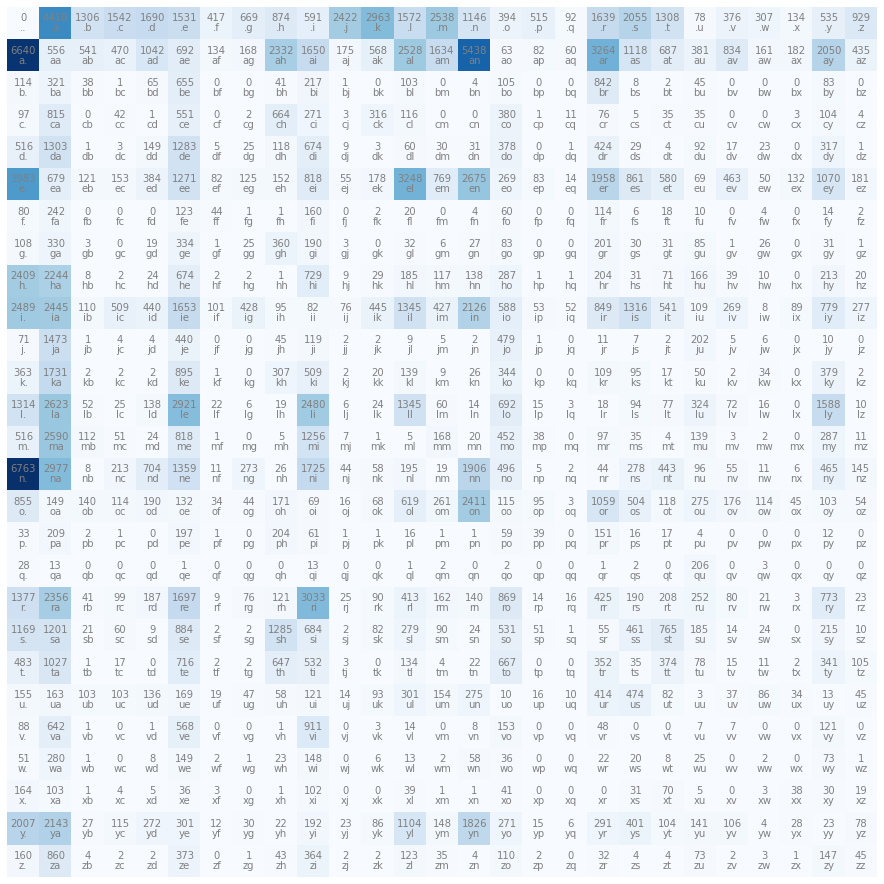

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='top', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='bottom', color='gray')

plt.axis('off')

In [58]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [59]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [63]:
g = torch.Generator().manual_seed(1)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'a'

In [85]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [87]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0,
        0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1,
        1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0,
        0, 0, 0, 1])

In [88]:
p.shape

torch.Size([3])

In [92]:
P.sum(1).shape

torch.Size([27])

In [99]:
P = (N+1).float()
P.sum(1, keepdim=True).shape
P = P / P.sum(1, keepdim=True)
P.shape

torch.Size([27, 27])

In [101]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(5):

    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, generator=g, replacement=True).item()
        out.append(itos[ix])
        if ix == 0:
            break
    
    print(''.join(out))


mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


#### max likelihood of data -> max log likelihood -> minimize negative log likelihood -> min average log likelihood

In [104]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [105]:
0.0 + torch.tensor(-2.0)

tensor(-2.)

In [106]:
# create training set

xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [107]:
xs.shape, ys.shape

(torch.Size([5]), torch.Size([5]))

In [108]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc.shape

torch.Size([5, 27])

In [110]:
xs

tensor([ 0,  5, 13, 13,  1])

In [109]:
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

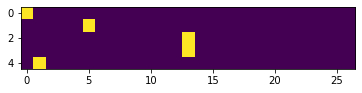

In [111]:
plt.imshow(xenc)

In [115]:
W = torch.randn(27, 27)
W.shape, xenc.shape

(torch.Size([27, 27]), torch.Size([5, 27]))

In [116]:
xenc @ W

tensor([[-2.0112,  0.5626, -0.0961, -0.1769,  0.8342,  0.6110,  0.9781, -0.7082,
          0.9927, -0.8392,  0.5321, -0.9587, -0.0195, -0.5760, -2.0046,  0.5921,
         -1.2219,  0.2264,  1.2494,  0.8865,  0.0243,  0.4614, -0.3636, -0.0896,
          0.8958,  0.3498, -2.0183],
        [-0.7069,  0.1551,  0.4366, -1.0588, -0.3262,  0.0692, -1.7689, -0.7549,
          0.4651,  1.2499,  0.3303, -0.9940,  0.3022, -0.6525,  0.3624,  1.1722,
          0.3827, -1.6595,  0.9497,  1.5509, -0.5648,  1.8375, -0.6891, -1.0949,
          0.5154, -0.5208,  0.2781],
        [ 1.6822, -0.3064,  1.3471, -1.0864, -0.8577,  1.0761,  0.8657, -0.1526,
         -0.1043, -0.5649,  0.0870, -0.0628, -1.0400,  1.9683,  0.8563, -1.1003,
          0.3620, -3.1591, -0.9154,  0.7712, -0.7150,  0.7234,  0.5490, -0.1098,
          1.3793,  0.7575, -0.4303],
        [ 1.6822, -0.3064,  1.3471, -1.0864, -0.8577,  1.0761,  0.8657, -0.1526,
         -0.1043, -0.5649,  0.0870, -0.0628, -1.0400,  1.9683,  0.8563, -1.1003

In [117]:
logits = xenc @ W # logn counts
counts = logits.exp()
counts_prob = counts / counts.sum(1, keepdims=True)
counts_prob.shape

torch.Size([5, 27])

In [120]:
counts_prob[0].sum()

tensor(1.0000)

In [121]:
xs

tensor([ 0,  5, 13, 13,  1])

In [122]:
ys

tensor([ 5, 13, 13,  1,  0])

In [123]:
g

In [124]:
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [125]:
logits = xenc @ W
counts = logits.exp()
counts_prob = counts / counts.sum(1, keepdims=True)
counts_prob.shape

torch.Size([5, 27])

In [131]:
loss = -counts_prob[torch.arange(5), ys].log().mean()
loss.item()

3.4028587341308594

In [132]:
print(W.grad)

None


In [133]:
loss.backward()

In [135]:
W.grad.shape

torch.Size([27, 27])

In [136]:
W.data += -0.1 * W.grad

In [137]:
## Putting it all together

xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [138]:
xs.shape

torch.Size([228146])

In [142]:
n_examples = xs.nelement()

In [141]:
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [145]:
for k in range(50):

    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(n_examples), ys].log().mean() + 0.01 * (W**2).mean()
    print(loss.item())

    W.grad = None
    loss.backward()
    W.data += -50 * W.grad

2.6641898155212402
2.6499781608581543
2.6376845836639404
2.6269283294677734
2.6174278259277344
2.6089677810668945
2.6013827323913574
2.5945394039154053
2.58833384513855
2.582679510116577
2.5775060653686523
2.572754383087158
2.568375825881958
2.5643274784088135
2.560574769973755
2.557086706161499
2.5538363456726074
2.5508010387420654
2.5479609966278076
2.5452980995178223
2.542797327041626
2.5404436588287354
2.5382256507873535
2.536132574081421
2.534153938293457
2.532280445098877
2.5305049419403076
2.528820276260376
2.527219533920288
2.5256974697113037
2.524247884750366
2.5228664875030518
2.521548271179199
2.520289897918701
2.519087076187134
2.517936944961548
2.516836643218994
2.515782594680786
2.5147721767425537
2.513803482055664
2.512874126434326
2.51198148727417
2.5111236572265625
2.5102996826171875
2.509506940841675
2.508744478225708
2.5080106258392334
2.507303476333618
2.506622552871704
2.5059664249420166
